In [2]:
!pip install lime #local interpretable model agnostic explanation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=301a0e1c714ffc6e227976c2e6e7bc1496211f1b3fdb1459cec744167609deaf
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lime
import lime.lime_tabular

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


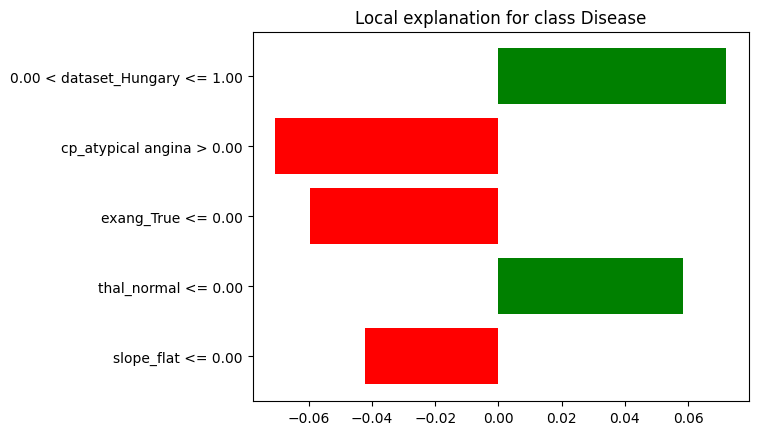

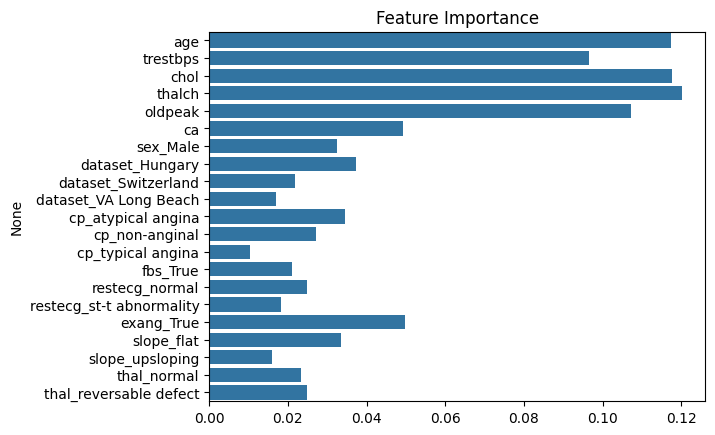

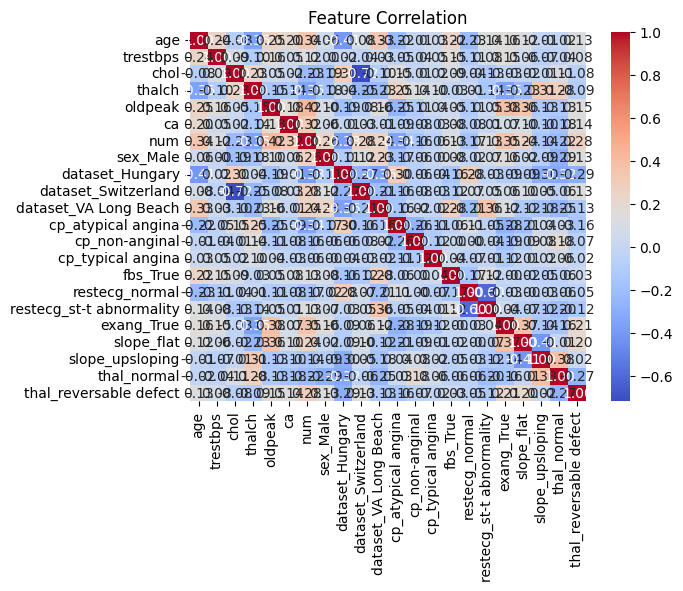

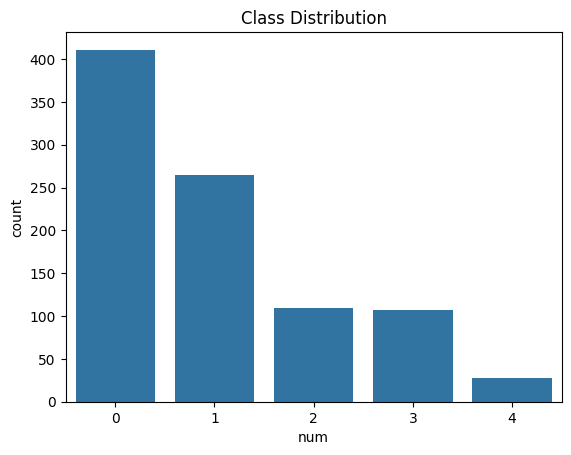

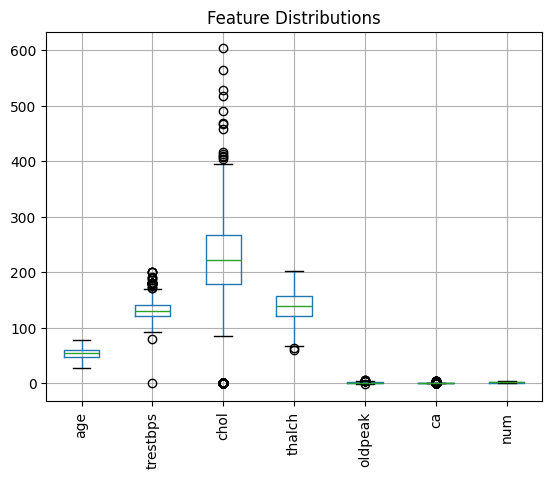

In [5]:
# Load dataset
data = pd.read_csv("heart1.csv")

# Handle missing values (only for numerical columns)
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)


# Split dataset
X, y = data.drop(columns=["num"]), data["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, feature_names=X.columns.tolist(),
    class_names=['No Disease', 'Disease'], mode='classification'
)

# Explain instance
exp = explainer.explain_instance(X_test.iloc[0].values, clf.predict_proba, num_features=5)
exp.show_in_notebook()
exp.as_pyplot_figure(); plt.show()

# Feature importance
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.title("Feature Importance"); plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation"); plt.show()

# Class distribution
sns.countplot(x=y).set_title("Class Distribution")
plt.show()

# Boxplot for feature distributions
data.select_dtypes(include=[np.number]).boxplot(rot=90)
plt.title("Feature Distributions"); plt.show()